# RCAES - Final Project

### 1. Establish a data wrangling routine for .csv data
### 2. Reimplement the classic air pollution time variation plots in package R <ins>[openair](https://davidcarslaw.github.io/openair/)</ins> using Python functions
### 3. Ozone concentration prediction using two main precursors - NOx and VOCs

                                                                                            Siyi Wang
                                                                                            Dec 3rd, 2023

In [1]:
## import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
# %matplotlib inline

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

# Data Wrangling Routine for .csv format data

### 1. Read the data and have a quick look of the whole dataset
Here is reading from a local file

----------
Variables:
- no2, hcho, o3: number density of NO2 and HCHO and Ozone, unit: molec/cm^-3
- zpbl: planet boundary layer height, unit: meter
- ps: Surface Pressure, unit: Pa
- t2m: Temperature at 2 meters, unit: K

In [2]:
## read data, set 'time' column to datetime class
df = pd.read_csv('./rcaes_final_project_data.csv', index_col = [0], parse_dates = ['time'])

In [3]:
## check first five events
df.head()

,time,city,lat,lon,no2_n,hcho_n,o3_n,zpbl,ps,t2m
0,2020-01-01 00:30:00.000003,New York City,40.712728,-74.006015,8.396244e+11,7.153604e+10,1.566139e+10,306.02014,99984.57,274.76147
1,2020-01-01 01:30:00.000000,New York City,40.712728,-74.006015,8.380680e+11,7.908448e+10,4.649252e+09,311.52695,100005.43,274.32248
2,2020-01-01 02:29:59.999997,New York City,40.712728,-74.006015,7.601125e+11,7.150831e+10,6.678436e+09,350.99933,100013.57,273.89800
3,2020-01-01 03:30:00.000003,New York City,40.712728,-74.006015,7.405007e+11,6.084877e+10,1.206445e+10,412.98233,100017.55,273.47186
4,2020-01-01 04:30:00.000000,New York City,40.712728,-74.006015,7.282951e+11,5.437952e+10,2.423140e+10,491.99466,100014.30,273.12234


In [4]:
## check df shape
print(df.shape)

(31524, 10)


In [5]:
## check data type in this dataframe
df.dtypes

time      datetime64[ns]
city              object
lat              float64
lon              float64
no2_n            float64
hcho_n           float64
o3_n             float64
zpbl             float64
ps               float64
t2m              float64
dtype: object

In [6]:
## check statistics of the dataset
df.describe()

,time,lat,lon,no2_n,hcho_n,o3_n,zpbl,ps,t2m
count,31524,3.152400e+04,3.152400e+04,3.150000e+04,3.150000e+04,3.150000e+04,31524.000000,31524.000000,31500.000000
mean,2021-10-18 18:00:00,4.071273e+01,-7.400602e+01,6.148797e+11,8.227152e+10,6.006633e+11,661.420952,101260.143805,285.496116
min,2020-01-01 00:30:00.000003,4.071273e+01,-7.400602e+01,7.223318e+10,5.120619e+09,2.057652e+01,59.947590,97984.090000,255.771790
25%,2020-11-24 09:15:00.000001536,4.071273e+01,-7.400602e+01,3.259521e+11,4.614894e+10,1.652842e+11,213.520608,100773.572500,276.791612
50%,2021-10-18 18:00:00,4.071273e+01,-7.400602e+01,6.138610e+11,7.111671e+10,4.426882e+11,459.888945,101231.765000,285.100470
75%,2022-09-12 02:44:59.999998464,4.071273e+01,-7.400602e+01,8.454717e+11,1.054689e+11,9.022771e+11,955.801010,101762.648500,294.445733
max,2023-08-06 11:29:59.999997,4.071273e+01,-7.400602e+01,2.468853e+12,1.151003e+12,2.845983e+12,3099.254400,103642.875000,310.954770
std,NaN,8.867714e-12,1.946918e-12,3.193632e+11,5.576931e+10,5.446494e+11,572.125664,755.777233,10.495110


In [7]:
## check lengths of the dataframe, AKA number of observations in this dataframe
print(len(df))

31524


In [8]:
## check mising values
df.isnull().sum()

time       0
city       0
lat        0
lon        0
no2_n     24
hcho_n    24
o3_n      24
zpbl       0
ps         0
t2m       24
dtype: int64

In [9]:
## check columns
df.columns

Index(['time', 'city', 'lat', 'lon', 'no2_n', 'hcho_n', 'o3_n', 'zpbl', 'ps',
       't2m'],
      dtype='object')

In [10]:
## check zero values
(df[['no2_n', 'hcho_n', 'o3_n']] == 0).sum()

no2_n     0
hcho_n    0
o3_n      0
dtype: int64

### 2. Handle missing values/wrong values
Due to different data observation or data acquisition methods, the quality of data varies. In actual use, missing values or zero values are often encountered. These values will affect the results of data analysis, so these values must be handled.

Here I am simply dropping events that contain missing values because my dataset contains very little NaNs

In [11]:
## From the analysis in the session above, there are 24 out of 31524 NaNs in the temperature columns
## So let's just drop corresponding rows with missing values
df = df.dropna()

## check the shape after dropping NaAs
print(df.shape)

(31500, 10)


### 3. Key step to time series analysis-Set time as index of the dataframe

In [12]:
## set time column as index and keep the column, just in case
df = df.set_index('time', drop=False)
df.head()

,time,city,lat,lon,no2_n,hcho_n,o3_n,zpbl,ps,t2m
time,,,,,,,,,,
2020-01-01 00:30:00.000003,2020-01-01 00:30:00.000003,New York City,40.712728,-74.006015,8.396244e+11,7.153604e+10,1.566139e+10,306.02014,99984.57,274.76147
2020-01-01 01:30:00.000000,2020-01-01 01:30:00.000000,New York City,40.712728,-74.006015,8.380680e+11,7.908448e+10,4.649252e+09,311.52695,100005.43,274.32248
2020-01-01 02:29:59.999997,2020-01-01 02:29:59.999997,New York City,40.712728,-74.006015,7.601125e+11,7.150831e+10,6.678436e+09,350.99933,100013.57,273.89800
2020-01-01 03:30:00.000003,2020-01-01 03:30:00.000003,New York City,40.712728,-74.006015,7.405007e+11,6.084877e+10,1.206445e+10,412.98233,100017.55,273.47186
2020-01-01 04:30:00.000000,2020-01-01 04:30:00.000000,New York City,40.712728,-74.006015,7.282951e+11,5.437952e+10,2.423140e+10,491.99466,100014.30,273.12234


### 4. Define a function to add more time features (optional to use)

In [13]:
def addTimeFeatures(df):
    """
    This function set time column as index of the data frame 
    and add more time series variables
    
    Returns
    ----------
    pandas.DataFrame 
    
    """
    # Set index while keeping the 'time' column
    df.index = df['time']
    # df.set_index('time', drop=False)
    
    ## get the year of each record, and assign this to a new column
    df['year'] = df.index.year
    ## get the month of each record, and assign this to a new column
    df['month'] = df.index.month
    ## get the day of each record, and assign this to a new column
    df['day'] = df.index.day
    ## get the hour of each record, and assign this to a new column
    df['hour'] = df.index.hour
    ## get the day of the year of each record, and assign this to a new column
    df['dayofyear'] = df.index.dayofyear
    ## get the day of the week of each record, and assign this to a new column
    df['dayofweek'] = df.index.dayofweek
    ## get the quarter of each record, and assign this to a new column
    df['quarter'] = df.index.quarter

    return df

In [14]:
df_ts = addTimeFeatures(df)
df_ts.head()

,time,city,lat,lon,no2_n,hcho_n,o3_n,zpbl,ps,t2m,year,month,day,hour,dayofyear,dayofweek,quarter
time,,,,,,,,,,,,,,,,,
2020-01-01 00:30:00.000003,2020-01-01 00:30:00.000003,New York City,40.712728,-74.006015,8.396244e+11,7.153604e+10,1.566139e+10,306.02014,99984.57,274.76147,2020,1,1,0,1,2,1
2020-01-01 01:30:00.000000,2020-01-01 01:30:00.000000,New York City,40.712728,-74.006015,8.380680e+11,7.908448e+10,4.649252e+09,311.52695,100005.43,274.32248,2020,1,1,1,1,2,1
2020-01-01 02:29:59.999997,2020-01-01 02:29:59.999997,New York City,40.712728,-74.006015,7.601125e+11,7.150831e+10,6.678436e+09,350.99933,100013.57,273.89800,2020,1,1,2,1,2,1
2020-01-01 03:30:00.000003,2020-01-01 03:30:00.000003,New York City,40.712728,-74.006015,7.405007e+11,6.084877e+10,1.206445e+10,412.98233,100017.55,273.47186,2020,1,1,3,1,2,1
2020-01-01 04:30:00.000000,2020-01-01 04:30:00.000000,New York City,40.712728,-74.006015,7.282951e+11,5.437952e+10,2.423140e+10,491.99466,100014.30,273.12234,2020,1,1,4,1,2,1


### 5. Define a function to manipulate the data in time dimension (optional to use)

   **Reference: [PyAURN](https://github.com/robintw/PyAURN)**

In [15]:
def timeAggr(df, avg_time='month', statistic='mean'):
    """
    Function to group the dataframe by a set time and specific statistic. Note: Datetime index

    Parameters
    ----------
    df : pandas.DataFrame
    avg_time : str
        time frequency with which to apply the grouping statistic. ["daily","month","year"]. Default is 'month'.
    statistic : str
        statistical method to apply to group values. ["mean","max","min","median","sum"]. Default is 'mean'.

    Returns
    ----------
    pandas.DataFrame
        returns a pandas.DataFrame time aggregated to specified frequency & statistic.
    """
    if avg_time == "daily":
        time_df = df.groupby(pd.Grouper(freq='D')).agg(statistic)
    elif avg_time == "month":
        time_df = df.groupby(pd.Grouper(freq='M')).agg(statistic)
    elif avg_time == "year":
        time_df = df.groupby(pd.Grouper(freq='Y')).agg(statistic)
    
    return time_df

In [16]:
pollutants = df[['no2_n', 'hcho_n', 'o3_n']]
df_timeaggr = timeAggr(pollutants)
df_timeaggr.head()

,no2_n,hcho_n,o3_n
time,,,
2020-01-31,6.282142e+11,8.603472e+10,2.790763e+11
2020-02-29,6.889181e+11,8.699378e+10,2.868904e+11
2020-03-31,6.862860e+11,6.462305e+10,4.960659e+11
2020-04-30,6.250842e+11,5.638604e+10,6.324522e+11
2020-05-31,5.625282e+11,6.846526e+10,6.795079e+11


# Time Variation Plot Inspired by R OpenAir

**Reference: [OpenAir](https://bookdown.org/david_carslaw/openair/)-[TimeVariation](https://bookdown.org/david_carslaw/openair/sections/trend-analysis/time-variation.html)**

It is important to know the variation of pollutants in different time scales, OpenAir package offers lots of useful functions to visualize those variations, however, it is a R package. Here I am using python to re-implement the classic time variation plots in OpenAir.

In [17]:
def time_variation(df, pollutant, ylabel, color='red'):
    """
    This function plot time series variations, 
    make sure to have a datetime column named 'date' in the dataframe before using the function.
    
    Parameters
    ----------
    df : pandas.DataFrame
    pollutant : column name of targeted pollutant
    color : plot color
     
    Returns
    ----------
    matplotlib.pyplot objects
    """
    
    # Setting xticklabels
    week = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    # Converting feature date to datetime and dropping Nan values
    df['date'] = pd.to_datetime(df['time'])
    
    # Creating graphs of pollutant concentrations by hour, month and day of week
    fig,axes = plt.subplots(1, 3, sharey=False, sharex=False, figsize=(16,4))
    fig.tight_layout(pad=-2)
    sns.set_style('whitegrid')
    
    # Concentration by Hour
    axes[0] = sns.lineplot(ax=axes[0],data=df,
                            x=df['date'].dt.hour,
                            y=pollutant,
                            color=color,
                            linewidth=1.5,
                            palette="hls")
    # Set y-axis to scientific notation
    axes[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0].ticklabel_format(axis='y', style='sci')
    axes[0].set_xticklabels(axes[0].get_xticks(), fontsize=13)
    axes[0].set_yticklabels(axes[0].get_yticks(), fontsize=13)
    axes[0].set_xlabel('Hour', fontsize=15)
    axes[0].set_ylabel(ylabel, fontsize=15)
    
    # Concentration by Month
    axes[1] = sns.lineplot(ax=axes[1],
                           data=df,
                           x=df['date'].dt.month,
                           y=pollutant,
                           color=color,
                           linewidth=1.5,
                           palette="hls")
    axes[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1].ticklabel_format(axis='y', style='sci')
    axes[1].set_xticks(np.arange(1, 13, 1))
    axes[1].set_xticklabels(months, fontsize=13)
    axes[1].set_yticklabels('')
    axes[1].set_xlabel('Month', fontsize=15)
    axes[1].set_ylabel('')
    
    # Concentration vs Day of Week
    axes[2] = sns.lineplot(ax=axes[2],
                           data=df,
                           x=df['date'].dt.dayofweek,
                           y=pollutant,
                           color=color,
                           linewidth=1.5,
                           palette="hls")
    axes[2].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[2].ticklabel_format(axis='y', style='sci')
    axes[2].set_xticks(np.arange(0, 7, 1))
    axes[2].set_xticklabels(week, fontsize=13)
    axes[2].set_yticklabels('')
    axes[2].set_xlabel('Day of Week', fontsize=15)
    axes[2].set_ylabel('')
    
    # Concentration by hour & by specific day of week
    fig2, axes2 = plt.subplots(1, 7, sharex=True, figsize=(16,2))
    fig2.tight_layout(pad=-2)
    # Setting the lim of y due to max mean
    pollutant_max=max(df.groupby(df['date'].dt.hour)[pollutant].mean())*1.2
    # Plotting
    for i in range(7):
        axes2[i] = sns.lineplot(ax=axes2[i],data=df,
                                x=df[df.date.dt.dayofweek==i]['date'].dt.hour,
                                y=pollutant,
                                color=color,
                                linewidth=1,
                                palette="hls")
        axes2[i].set_xlabel('Hour', fontsize=12)
        if i == 0:
            axes2[i].set_ylabel(ylabel, fontsize=12)
        else:
            axes2[i].set_ylabel('')
            axes2[i].set_yticklabels('')
        axes2[i].set_ylim(0, pollutant_max)
        axes2[i].set_title(week[i])
    
    return fig.show(), fig2.show()

(None, None)

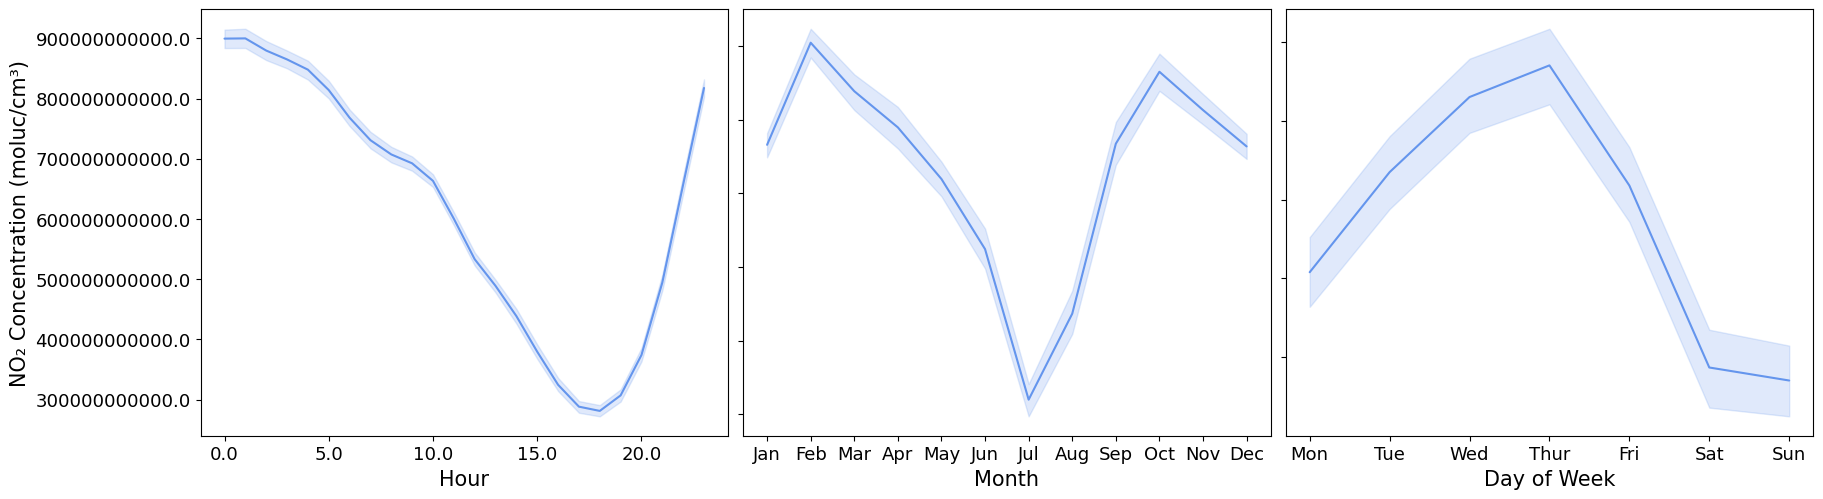

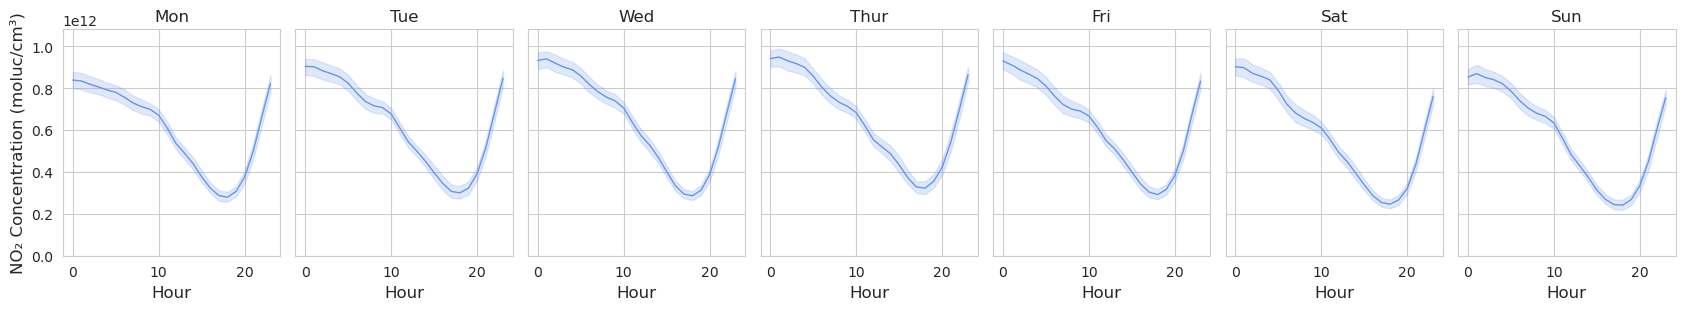

In [18]:
time_variation(df, 'no2_n', 'NO\u2082 Concentration (moluc/cm\u00b3)', color='cornflowerblue')

(None, None)

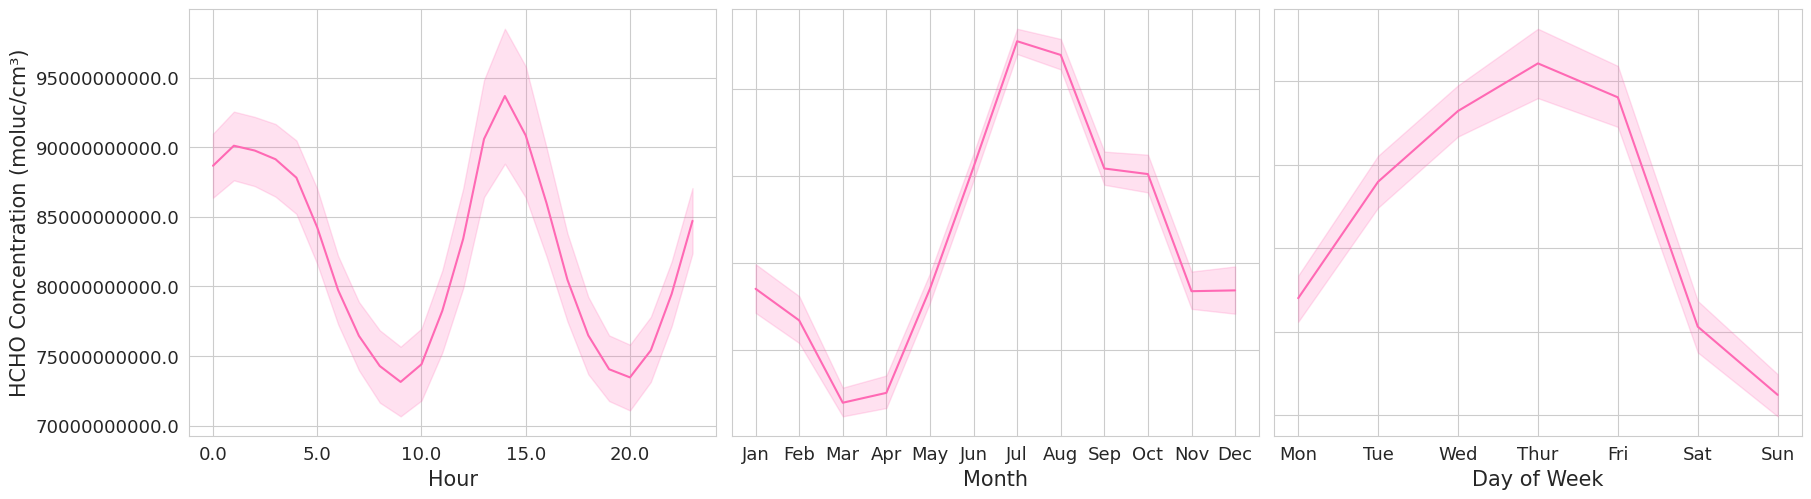

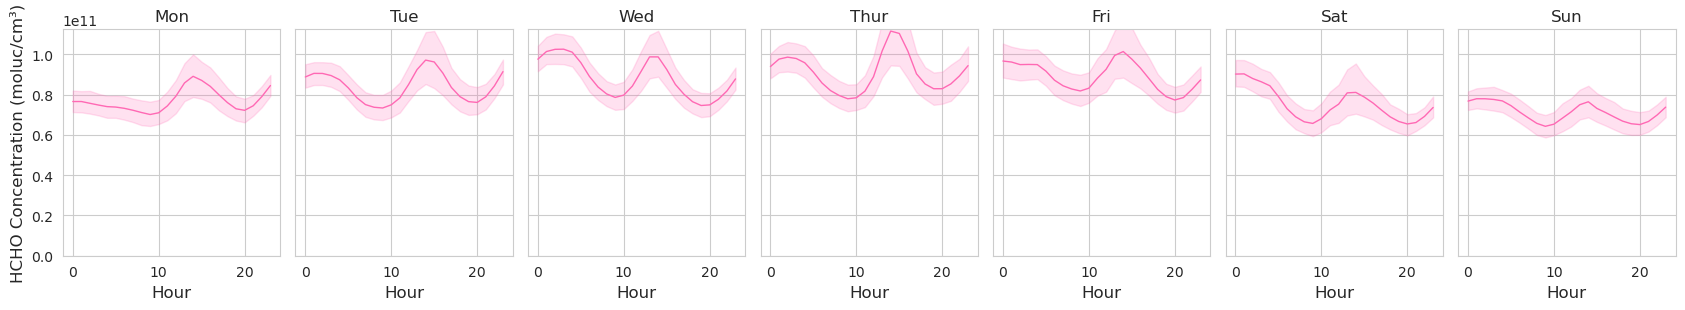

In [19]:
time_variation(df, 'hcho_n', 'HCHO Concentration (moluc/cm\u00b3)', color='hotpink')

(None, None)

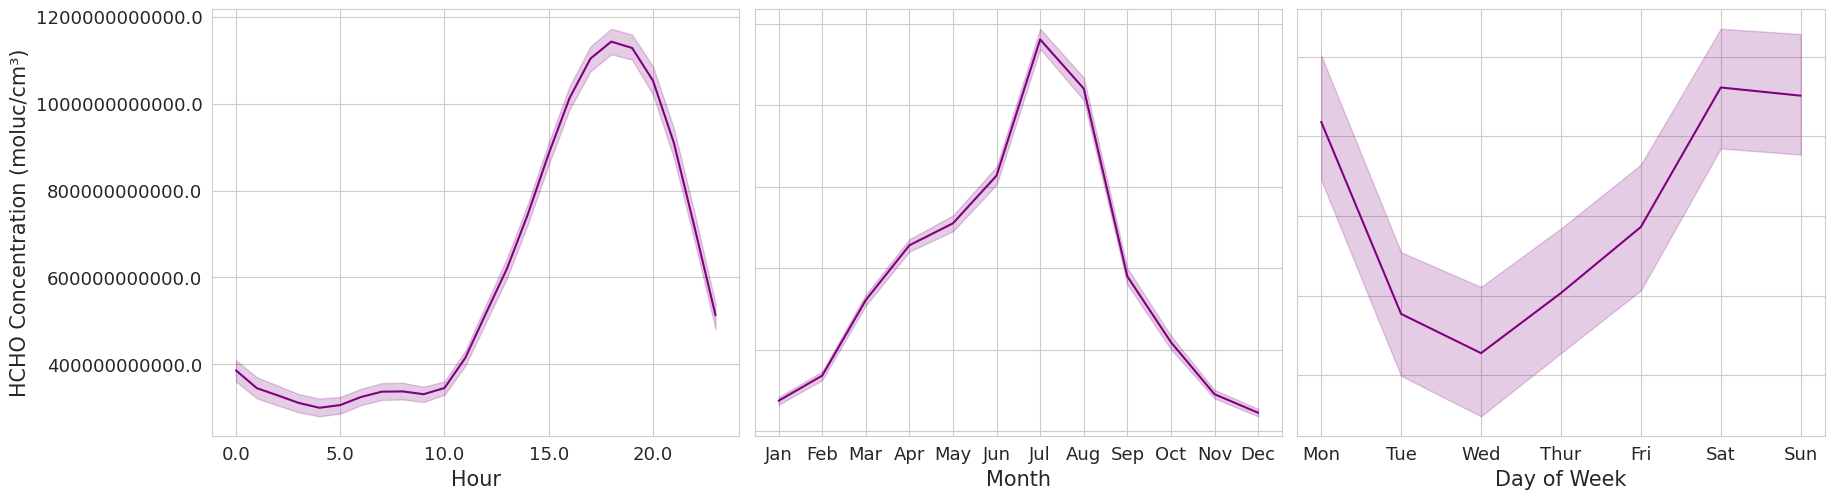

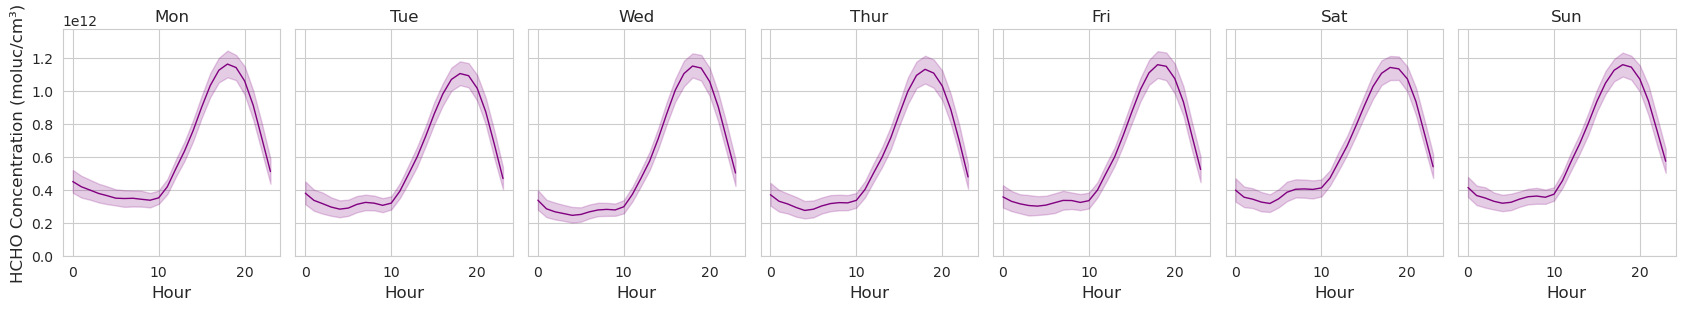

In [20]:
time_variation(df, 'o3_n', 'HCHO Concentration (moluc/cm\u00b3)', color='purple')

In [21]:
def windRose(df,years,save=False):
    """
    Function to plot a wind rose from a dataframe of wind speed and direction. 
    Uses the windrose package - https://python-windrose.github.io/windrose/index.html - Lionel Roubeyrie & Sebastien Celles. 

    Parameters
    ----------
    df : pandas.DataFrame
        dataframe containing wind speed and direction columns.
    years : list of int 
        years to plot from the dataframe.
    save : bool
        whether to save the plot to a file. Default is False.

    Returns
    ----------
    matplotlib.pyplot
        returns a matplotlib.pyplot wind rose plot.
    """

    ## subset the dataframe to the years of interest
    df = df[df['date'].dt.year.isin(years)]
    ax = windrose.plot_windrose(df,kind='bar',var_name='ws',direction_name='wd',normed=True)
    years = set([df['date'].min().strftime('%Y'),df['date'].max().strftime('%Y')])
    # concat the years into a string
    years = "-".join(years)

    ax.set_title(f"{df['site'].iloc[0]} - {df['code'].iloc[0]} - {years} Wind Rose")
    ax
    if save == True:
        fig = ax.get_figure()
        fig.savefig(f"{df['site'].iloc[0]}_wind_rose.png")

# Ozone concentration prediction using two main precursors - NOx and VOCs

Mean Squared Error: 1.2552561393611583e+23
R-Squared: 0.5814310083592308


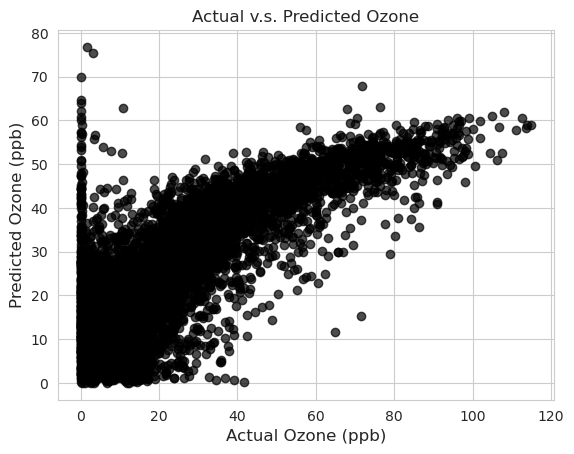

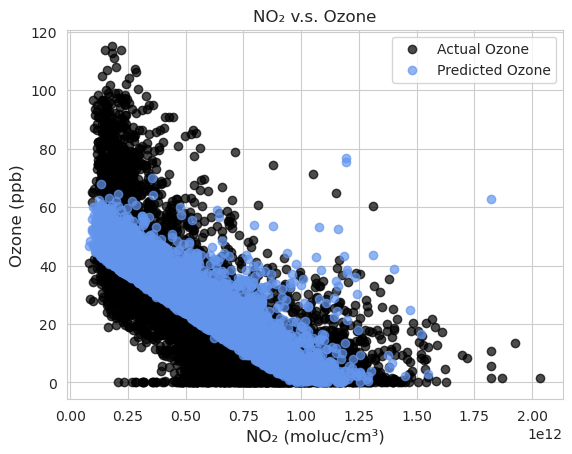

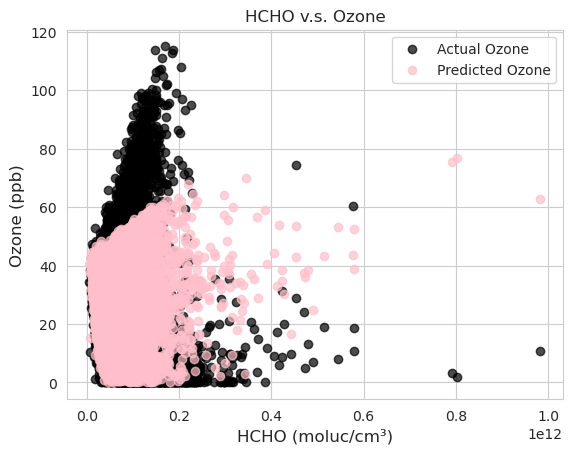

In [22]:
# Copy original data to a new vairable
data = df

# Feature selection
features = ['no2_n', 'hcho_n']
target = 'o3_n'

# Extract features and target variable
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r_square = r2_score(y_test, y_pred)
print(f'R-Squared: {r_square}')

# Convert the Ozone concentration to mixing ratio (unit: ppb) using ideal gas law
## simplipication: Pressure - 985hpa; Temperature - 291K
y_test_ppb = ((y_test*10**6)*8.31*291)/((985*100)*(6.022*10**23))*10**9
y_pred_ppb = ((y_pred*10**6)*8.31*291)/((985*100)*(6.022*10**23))*10**9

# Replace predicted values < zero with NaNs
y_pred[y_pred < 0] = np.nan
y_pred_ppb[y_pred_ppb < 0] = np.nan

# Plotting actual vs predicted values
plt.scatter(y_test_ppb, y_pred_ppb, color='black', alpha =0.7)
plt.xlabel('Actual Ozone (ppb)', fontsize='large')
plt.ylabel('Predicted Ozone (ppb)', fontsize='large')
plt.title('Actual v.s. Predicted Ozone')
plt.show()

# Plotting actual vs predicted values vs NO2
plt.scatter(X_test['no2_n'], y_test_ppb, color='black', alpha =0.7, label='Actual Ozone')
plt.scatter(X_test['no2_n'], y_pred_ppb, color='cornflowerblue', alpha =0.7, label='Predicted Ozone')
plt.xlabel('NO\u2082 (moluc/cm\u00b3)', fontsize='large')
plt.ylabel('Ozone (ppb)', fontsize='large')
plt.title('NO\u2082 v.s. Ozone')
plt.legend()
plt.show()

# Plotting actual vs predicted values vs HCHO
plt.scatter(X_test['hcho_n'], y_test_ppb, color='black', alpha =0.7, label='Actual Ozone')
plt.scatter(X_test['hcho_n'], y_pred_ppb, color='pink', alpha = 0.7, label='Predicted Ozone')
plt.xlabel('HCHO (moluc/cm\u00b3)', fontsize='large')
plt.ylabel('Ozone (ppb)', fontsize='large')
plt.title('HCHO v.s. Ozone')
plt.legend()
plt.show()

***The plots above indicate our model predicts reasonable values.***

***So let's predict the ozone trend over the entire time period using this multivariable linear regression model.***

In [26]:
# Predict the values
pred = model.predict(X)

# Replace predicted values less than zero with NaNs
pred[pred < 0] = np.nan

# Convert the Ozone concentration to mixing ratio (unit: ppb) using ideal gas law
## simplipication: Pressure - 985hpa; Temperature - 291K
y_ppb = ((y*10**6)*8.31*291)/((985*100)*(6.022*10**23))*10**9
pred_ppb = ((pred*10**6)*8.31*291)/((985*100)*(6.022*10**23))*10**9
pred_ppb

array([10.6865899 , 11.66026634, 15.1235728 , ..., 12.8016745 ,
       17.02954377, 25.32396505])

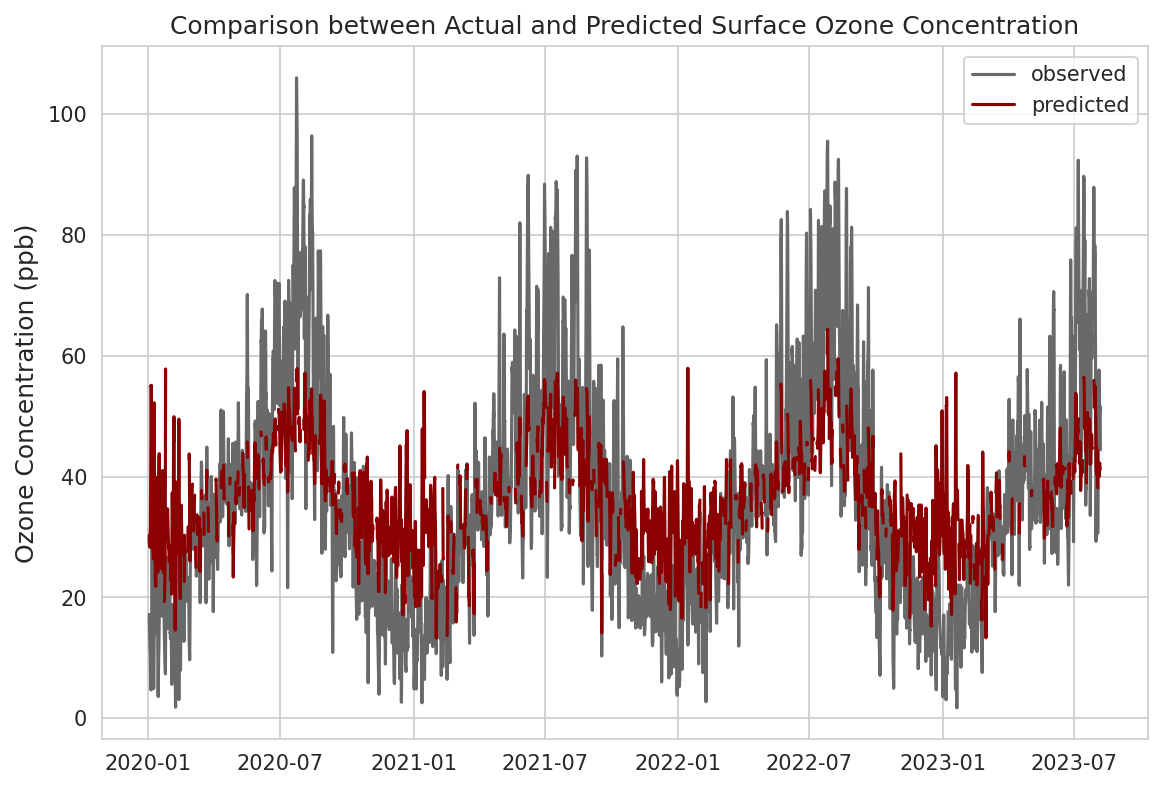

In [27]:
# Create a DataFrame
o3_df = pd.DataFrame({'time': df.time, 'y': y_ppb, 'pred': pred_ppb})

# Set time to datetime and as index
o3_df['time'] = pd.to_datetime(o3_df['time']) #,format='%Y-%m-%d'
o3_df.set_index('time', inplace=False)

# Perform an rolling average to get the daily 8 hour maximum rolling average
o3_df['y_rolling_avg'] = o3_df['y'].rolling(window=8).max().rolling(window=24).mean()
o3_df['pred_rolling_avg'] = o3_df['pred'].rolling(window=8).max().rolling(window=24).mean()

# Compare the predicted values to actual values
plt.figure(figsize=(9, 6), dpi=150)
plt.plot(o3_df.y_rolling_avg, color='dimgrey', label='observed')
plt.plot(o3_df.time, o3_df.pred_rolling_avg, color='darkred', label='predicted')
plt.xlabel('')
plt.ylabel('Ozone Concentration (ppb)', fontsize='large')
plt.title('Comparison between Actual and Predicted Surface Ozone Concentration')
plt.legend()
plt.show()